<a href="https://colab.research.google.com/github/Park20182618/dl17/blob/main/notebook/ch03_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to ML
### sklearn
- iris : knn
- logits : knn
- confusion matrix (혼동행렬)

## iris dataset

In [ ]:
# iris dataset
from sklearn import datasets
iris = datasets.load_iris()

# print(iris)
# iris.data.shape
# iris.target.shape
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [ ]:

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [ ]:
y_pred,y_test

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

## 정확도 평가

In [ ]:

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)


0.9666666666666667


In [ ]:

#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 2개 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa


### Decision boundary

In [ ]:
pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


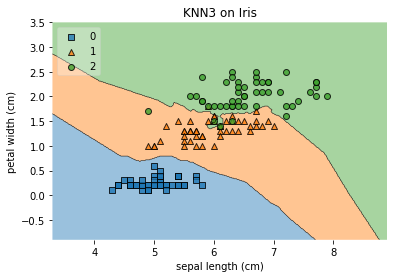

In [ ]:

############################################################
# Decision boundary
# from mlxtend.plotting import plot_decision_regions
############################################################
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions of two features
ft_names = iris.feature_names
two_feature_idx = [0,3]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('KNN3 on Iris')
plt.show()


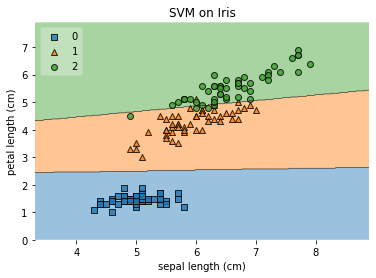

In [ ]:

########################################################
# SVM
########################################################
# Training a classifier
from sklearn.svm import SVC

ft_names = iris.feature_names
two_feature_idx = [0,2]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=svm, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('SVM on Iris')
plt.show()
########################################################


In [ ]:
# 필요한 라이브러리를 불러오기
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기 (붓꽃 데이터셋 사용)
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (kNN은 거리를 기반으로 하기 때문에 표준화가 필요함)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# kNN 분류기 생성 및 학습 (k = 3으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn.predict(X_test)

# 분류기의 정확도 측정
accuracy = accuracy_score(y_test, y_pred)
print("kNN 분류기의 정확도:", accuracy)

kNN 분류기의 정확도: 1.0


## MNIST data
- knn



## Load digits dataset

In [25]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
str(digits)


'{\'data\': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 10.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 16.,  9.,  0.],\n       ...,\n       [ 0.,  0.,  1., ...,  6.,  0.,  0.],\n       [ 0.,  0.,  2., ..., 12.,  0.,  0.],\n       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), \'target\': array([0, 1, 2, ..., 8, 9, 8]), \'frame\': None, \'feature_names\': [\'pixel_0_0\', \'pixel_0_1\', \'pixel_0_2\', \'pixel_0_3\', \'pixel_0_4\', \'pixel_0_5\', \'pixel_0_6\', \'pixel_0_7\', \'pixel_1_0\', \'pixel_1_1\', \'pixel_1_2\', \'pixel_1_3\', \'pixel_1_4\', \'pixel_1_5\', \'pixel_1_6\', \'pixel_1_7\', \'pixel_2_0\', \'pixel_2_1\', \'pixel_2_2\', \'pixel_2_3\', \'pixel_2_4\', \'pixel_2_5\', \'pixel_2_6\', \'pixel_2_7\', \'pixel_3_0\', \'pixel_3_1\', \'pixel_3_2\', \'pixel_3_3\', \'pixel_3_4\', \'pixel_3_5\', \'pixel_3_6\', \'pixel_3_7\', \'pixel_4_0\', \'pixel_4_1\', \'pixel_4_2\', \'pixel_4_3\', \'pixel_4_4\', \'pixel_4_5\', \'pixel_4_6\', \'pixel_4_7\', \'pixel_5_0\', \'pixel_

In [26]:
digits.data.shape, digits.target.shape



((1797, 64), (1797,))

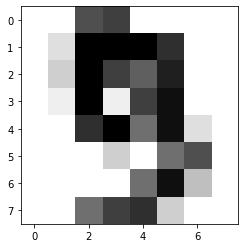

In [27]:
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
# digits.images.shape



In [28]:

n_samples = len(digits.images)
digits.images.shape



(1797, 8, 8)

In [29]:

# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))
data.shape


(1797, 64)

In [30]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


0.9861111111111112
[1]


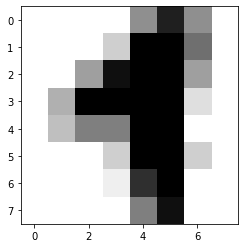

In [31]:

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)


3 [3]


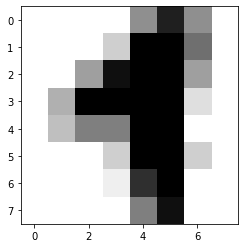

In [33]:
idx = 33


plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[idx]])
print(y_test[idx],y_pred)


In [36]:

#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

print(scores)


[0.9916666666666667, 0.9944444444444445, 0.9916666666666667, 0.9972222222222222, 0.9861111111111112, 0.9888888888888889, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112]


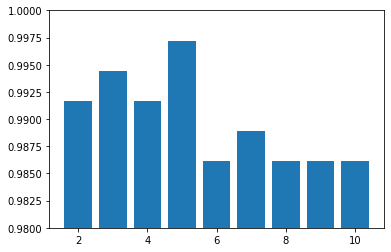

In [42]:

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
plt.ylim((0.98,1))
plt.show()


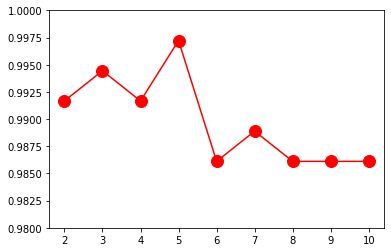

In [43]:

plt.plot(range(2,11), scores,'ro-', ms=12)
plt.ylim((0.98,1))
plt.show()

    
    
    
